In [1]:
import cv2
import glob
import os
cam = cv2.VideoCapture(0)

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

count = 0
while(True):
    ret, img = cam.read()
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        x1 = x
        y1 = y
        x2 = x+w
        y2 = y+h
        cv2.rectangle(img, (x1,y1), (x2,y2), (255,255,255), 2)     
        count += 1
        # Save the captured image into the datasets folder
        
        cv2.imwrite("images12/dany" + str(count) + ".jpg", img[y1:y2,x1:x2])
        for im in glob.glob("images12/dany"+"*.jpg"):
            img1 = cv2.imread(im)
            imgResized = cv2.resize(img1,(96,96))
            if count <= 15:
                cv2.imwrite("train set/dany" + str(count)+".jpg",imgResized)
            else:
                cv2.imwrite("test set/dany" + str(count)+".jpg",imgResized)
        
        
        cv2.imshow('image', img)
        
            
        
    k = cv2.waitKey(200) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 20: # Take 30 face sample and stop video
         break
cam.release()
cv2.destroyAllWindows()

In [2]:
from PIL import Image
import os
import numpy as np
import re
def get_data(path):
    all_images_as_array=[]
    label=[]
    for filename in os.listdir(path):
        try:
            if re.match(r'aarav',filename):
                label.append(0)
      
            else:
                label.append(1)
            img=Image.open(path + filename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape
            np_array = np_array.reshape(l*b*c,)
            all_images_as_array.append(np_array)
        except:
            continue
    return np.array(all_images_as_array), np.array(label)
path_to_train_set = 'C:/Users/Dany/1_dany/facerecog/train set/'
path_to_test_set = 'C:/Users/Dany/1_dany/facerecog/test set/'
X_train,y_train = get_data(path_to_train_set)
X_test, y_test = get_data(path_to_test_set)
print('X_train set : ',X_train)
print('y_train set : ',y_train)
print('X_test set : ',X_test)
print('y_test set : ',y_test)

X_train set :  [[252 255 253 ... 248 252 253]
 [251 254 255 ... 254 254 254]
 [255 255 251 ... 248 249 253]
 ...
 [255 255 251 ... 171 176 182]
 [255 255 251 ... 171 176 182]
 [252 254 251 ... 172 208 224]]
y_train set :  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
X_test set :  [[255 254 255 ... 244 252 255]
 [255 254 255 ... 244 252 255]
 [244 253 250 ... 184 194 183]
 ...
 [252 254 251 ... 172 208 224]
 [252 254 251 ... 172 208 224]
 [244 253 250 ... 184 194 183]]
y_test set :  [0 0 1 1 1 1 1 1 1]


In [3]:
X_train

array([[252, 255, 253, ..., 248, 252, 253],
       [251, 254, 255, ..., 254, 254, 254],
       [255, 255, 251, ..., 248, 249, 253],
       ...,
       [255, 255, 251, ..., 171, 176, 182],
       [255, 255, 251, ..., 171, 176, 182],
       [252, 254, 251, ..., 172, 208, 224]], dtype=uint8)

In [4]:
X_train.shape

(23, 27648)

In [5]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [6]:
y_train.shape

(23,)

In [7]:
train_labels = y_train.reshape(-1,1)
train_labels.shape

(23, 1)

In [8]:
test_labels = y_test.reshape(-1,1)
test_labels.shape

(9, 1)

In [9]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
print(tf.__version__)

2.4.1


In [10]:
class_names = ['araav', 'dany']

In [11]:
train_images = X_train.reshape(X_train.shape[0],3,96,96).transpose(0,2,3,1)
train_images.shape

(23, 96, 96, 3)

In [12]:
test_images = X_test.reshape(X_test.shape[0],3,96,96).transpose(0,2,3,1)
test_images.shape

(9, 96, 96, 3)

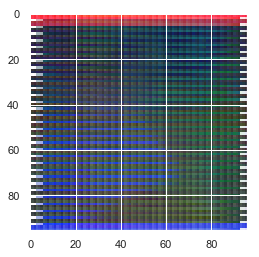

In [13]:
plt.imshow(train_images[3])

In [14]:
train_images,test_images = train_images / 255.0, test_images / 255.0

In [15]:
from sklearn.utils import shuffle
train_images ,train_labels = shuffle(train_images,train_labels)
test_images,test_labels = shuffle(test_images,test_labels)

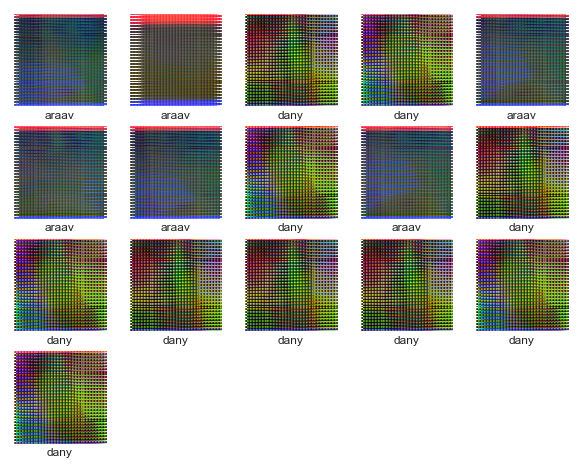

In [16]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [17]:
input_shape = (96, 96, 3)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(5,5)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(2048, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(2,activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 92, 92, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              16779264  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0

In [18]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history = model.fit(x=train_images,y=train_labels,validation_split=0.2,batch_size=4, epochs=5)

Epoch 1/5
5/5 [==============================] - 25s 4s/step - loss: 1.2005 - accuracy: 0.5081 - val_loss: 1.0475 - val_accuracy: 0.8000
Epoch 2/5
5/5 [==============================] - 10s 2s/step - loss: 2.1150 - accuracy: 0.6840 - val_loss: 2.0879e-04 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 10s 2s/step - loss: 0.0721 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 9s 2s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 8.0439e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


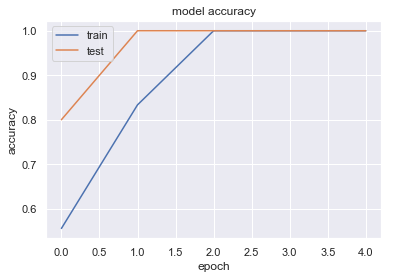

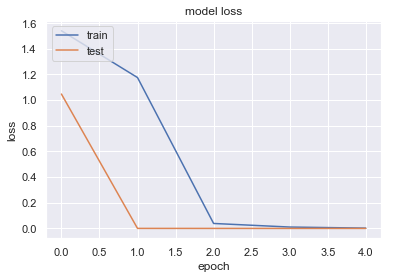

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
scor = model.evaluate( np.array(test_images),  np.array(test_labels), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.0000
test acc 1.0000


In [21]:
input_data = test_images[1].reshape((-1, 96, 96, 3))

In [22]:
input_data.shape

(1, 96, 96, 3)

In [23]:
model.predict_classes(input_data)

C:\Users\Dany\.conda\envs\kajal\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int64)

In [24]:
import cv2
cv2.namedWindow("Face Recognizer")
vc = cv2.VideoCapture(0)
   
font = cv2.FONT_HERSHEY_SIMPLEX
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while vc.isOpened():
        _, frame = vc.read()
        img = frame
        height, width, channels = frame.shape

        
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        # Loop through all the faces detected 
        identities = []
        for (x, y, w, h) in faces:
            x1 = x
            y1 = y
            x2 = x+w
            y2 = y+h
            face_image = frame[max(0, y1):min(height, y2), max(0, x1):min(width, x2)]
            
            
            imgResized = cv2.resize(face_image,(96,96))
            imgResized = np.asarray(imgResized)
            imgResized = imgResized.reshape((-1, 96, 96, 3))
            imgResized = imgResized.reshape(1,3,96,96).transpose(0,2,3,1)
            
            imgResized = imgResized / 255.0
            
            identity = model.predict_classes(imgResized)
            
            
            if identity is not None:
                img = cv2.rectangle(frame,(x1, y1),(x2, y2),(255,255,255),2)
                cv2.putText(img, str(class_names[identity.item()]), (x1+5,y1-5), font, 1, (255,0,0), 4)
                
            
        print(identity)  
        print(imgResized)
            
        key = cv2.waitKey(100)
        cv2.imshow("Face Recognizer", cv2.resize(img, (800, 600)))

        if key == 27: # exit on ESC
            break
vc.release()
cv2.destroyAllWindows()

[1]
[[[[0.09019608 0.03137255 0.31372549]
   [0.03529412 0.02352941 0.30980392]
   [0.03921569 0.03921569 0.25098039]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.07058824]
   [0.         0.01176471 0.19607843]]

  [[0.         0.         0.        ]
   [0.         0.         0.05882353]
   [0.         0.02745098 0.19215686]
   ...
   [0.00784314 0.         0.        ]
   [0.         0.02745098 0.        ]
   [0.         0.14901961 0.        ]]

  [[0.01176471 0.         0.        ]
   [0.         0.03529412 0.        ]
   [0.00392157 0.1372549  0.        ]
   ...
   [0.0627451  0.11372549 0.2627451 ]
   [0.0627451  0.09803922 0.29411765]
   [0.06666667 0.07843137 0.25098039]]

  ...

  [[0.04313725 0.30980392 0.35686275]
   [0.02745098 0.30980392 0.35294118]
   [0.02745098 0.23529412 0.28235294]
   ...
   [0.         0.         0.        ]
   [0.         0.08627451 0.        ]
   [0.01568627 0.19607843 0.        ]]

  [[0.         0.         0.        ]
   

[1]
[[[[0.41568627 0.03529412 0.91372549]
   [0.41960784 0.0627451  0.92156863]
   [0.4        0.0627451  0.80392157]
   ...
   [0.00784314 0.03921569 0.09411765]
   [0.04705882 0.13333333 0.32941176]
   [0.10588235 0.29019608 0.52156863]]

  [[0.01176471 0.04705882 0.09411765]
   [0.04705882 0.10980392 0.29411765]
   [0.12156863 0.27058824 0.47843137]
   ...
   [0.15294118 0.16470588 0.07843137]
   [0.38823529 0.37647059 0.10196078]
   [0.56470588 0.5372549  0.16078431]]

  [[0.11372549 0.12941176 0.05882353]
   [0.34117647 0.34901961 0.11764706]
   [0.5254902  0.50980392 0.16470588]
   ...
   [0.44705882 0.51372549 0.85882353]
   [0.45882353 0.54901961 0.87843137]
   [0.43529412 0.50980392 0.76470588]]

  ...

  [[0.02352941 0.89803922 0.92156863]
   [0.05098039 0.9254902  0.94509804]
   [0.08627451 0.80392157 0.80392157]
   ...
   [0.03137255 0.11372549 0.05882353]
   [0.10980392 0.37647059 0.06666667]
   [0.23921569 0.55686275 0.03921569]]

  [[0.         0.08627451 0.05098039]
   

[1]
[[[[0.43529412 0.49019608 0.93333333]
   [0.44705882 0.49019608 0.94901961]
   [0.44705882 0.44705882 0.80392157]
   ...
   [0.03529412 0.21176471 0.09411765]
   [0.04705882 0.40392157 0.30588235]
   [0.09411765 0.56078431 0.44705882]]

  [[0.03529412 0.19215686 0.05882353]
   [0.05098039 0.35686275 0.27843137]
   [0.10196078 0.51764706 0.43137255]
   ...
   [0.01568627 0.2        0.02352941]
   [0.07843137 0.4        0.07058824]
   [0.09803922 0.54509804 0.0627451 ]]

  [[0.05098039 0.15294118 0.01960784]
   [0.08627451 0.37647059 0.07843137]
   [0.10980392 0.54117647 0.0745098 ]
   ...
   [0.42352941 0.50588235 0.85490196]
   [0.45882353 0.54117647 0.89411765]
   [0.42745098 0.48235294 0.8       ]]

  ...

  [[0.49803922 0.92941176 0.92941176]
   [0.49803922 0.9372549  0.95686275]
   [0.4627451  0.81176471 0.82352941]
   ...
   [0.11372549 0.13333333 0.05882353]
   [0.2627451  0.3254902  0.0627451 ]
   [0.38431373 0.49411765 0.05098039]]

  [[0.10980392 0.09019608 0.05490196]
   

[1]
[[[[0.39607843 0.01176471 0.85490196]
   [0.4        0.03921569 0.87843137]
   [0.37254902 0.07843137 0.76862745]
   ...
   [0.03529412 0.00392157 0.17647059]
   [0.06666667 0.14901961 0.35294118]
   [0.08627451 0.25098039 0.50196078]]

  [[0.03921569 0.00784314 0.13333333]
   [0.0745098  0.13333333 0.29019608]
   [0.08627451 0.23921569 0.43137255]
   ...
   [0.04313725 0.17647059 0.05882353]
   [0.1254902  0.39607843 0.1254902 ]
   [0.29411765 0.56078431 0.14509804]]

  [[0.01960784 0.16470588 0.05882353]
   [0.0745098  0.37254902 0.15294118]
   [0.19215686 0.54509804 0.17254902]
   ...
   [0.45882353 0.4745098  0.84705882]
   [0.47058824 0.54509804 0.86666667]
   [0.44313725 0.50196078 0.77254902]]

  ...

  [[0.         0.82352941 0.9372549 ]
   [0.05882353 0.83921569 0.94901961]
   [0.07843137 0.71372549 0.81176471]
   ...
   [0.04705882 0.14901961 0.07058824]
   [0.12156863 0.36862745 0.0627451 ]
   [0.20392157 0.5372549  0.07058824]]

  [[0.05490196 0.09411765 0.05882353]
   

[1]
[[[[0.43529412 0.29411765 0.90588235]
   [0.47058824 0.29411765 0.93333333]
   [0.44313725 0.29411765 0.80392157]
   ...
   [0.00392157 0.05882353 0.08235294]
   [0.10588235 0.12156863 0.29803922]
   [0.24313725 0.28235294 0.44313725]]

  [[0.00392157 0.01176471 0.09803922]
   [0.10980392 0.11764706 0.28235294]
   [0.25098039 0.24313725 0.40392157]
   ...
   [0.17254902 0.14117647 0.06666667]
   [0.41568627 0.28235294 0.15294118]
   [0.58823529 0.43921569 0.18431373]]

  [[0.16862745 0.14901961 0.10980392]
   [0.40784314 0.30980392 0.20392157]
   [0.57647059 0.49803922 0.25882353]
   ...
   [0.43529412 0.71764706 0.87843137]
   [0.46666667 0.7372549  0.89803922]
   [0.43529412 0.64705882 0.78823529]]

  ...

  [[0.22352941 0.89803922 0.90196078]
   [0.26666667 0.92941176 0.93333333]
   [0.24313725 0.8        0.79607843]
   ...
   [0.03137255 0.1254902  0.01176471]
   [0.09019608 0.30980392 0.03921569]
   [0.16862745 0.49019608 0.05490196]]

  [[0.02352941 0.1372549  0.01176471]
   

[1]
[[[[0.42352941 0.1372549  0.91372549]
   [0.45490196 0.14901961 0.92941176]
   [0.41960784 0.1372549  0.81960784]
   ...
   [0.00392157 0.05490196 0.0627451 ]
   [0.1372549  0.18823529 0.19607843]
   [0.29411765 0.36078431 0.30980392]]

  [[0.00392157 0.03529412 0.04313725]
   [0.15294118 0.16078431 0.20784314]
   [0.30196078 0.34509804 0.31372549]
   ...
   [0.1254902  0.10196078 0.0627451 ]
   [0.42352941 0.24705882 0.08235294]
   [0.60784314 0.41176471 0.09411765]]

  [[0.11372549 0.08235294 0.0627451 ]
   [0.40392157 0.2745098  0.08627451]
   [0.59215686 0.42745098 0.09411765]
   ...
   [0.43529412 0.85882353 0.84705882]
   [0.48235294 0.90980392 0.88627451]
   [0.45490196 0.79215686 0.78431373]]

  ...

  [[0.07843137 0.90196078 0.88627451]
   [0.09411765 0.93333333 0.9254902 ]
   [0.10196078 0.80392157 0.77647059]
   ...
   [0.00392157 0.06666667 0.02745098]
   [0.14901961 0.21568627 0.12941176]
   [0.34117647 0.37254902 0.22745098]]

  [[0.         0.05490196 0.03921569]
   

[1]
[[[[0.07058824 0.56078431 0.91372549]
   [0.09019608 0.59215686 0.93333333]
   [0.05882353 0.54901961 0.80392157]
   ...
   [0.03137255 0.         0.0627451 ]
   [0.15686275 0.13333333 0.19215686]
   [0.3372549  0.27058824 0.36862745]]

  [[0.00392157 0.00392157 0.05098039]
   [0.16470588 0.12156863 0.17254902]
   [0.33333333 0.2627451  0.35686275]
   ...
   [0.19607843 0.09019608 0.03529412]
   [0.41568627 0.20784314 0.09019608]
   [0.59215686 0.35294118 0.16470588]]

  [[0.19215686 0.06666667 0.09019608]
   [0.40392157 0.21568627 0.14901961]
   [0.6        0.38039216 0.20392157]
   ...
   [0.43921569 0.86666667 0.81568627]
   [0.48235294 0.90588235 0.8745098 ]
   [0.45882353 0.80392157 0.77254902]]

  ...

  [[0.49803922 0.9254902  0.82352941]
   [0.51372549 0.94117647 0.88235294]
   [0.43921569 0.80392157 0.79607843]
   ...
   [0.01176471 0.03137255 0.07843137]
   [0.10980392 0.21176471 0.07843137]
   [0.23137255 0.40392157 0.07843137]]

  [[0.01568627 0.05098039 0.04313725]
   

[1]
[[[[0.42352941 0.13333333 0.9372549 ]
   [0.45490196 0.16078431 0.95686275]
   [0.42745098 0.1372549  0.79607843]
   ...
   [0.03921569 0.10196078 0.04313725]
   [0.18039216 0.21960784 0.21176471]
   [0.35686275 0.37254902 0.41176471]]

  [[0.05098039 0.07843137 0.04313725]
   [0.18431373 0.19215686 0.19215686]
   [0.36470588 0.36078431 0.38431373]
   ...
   [0.16078431 0.08627451 0.03921569]
   [0.40784314 0.23529412 0.1254902 ]
   [0.59215686 0.43921569 0.2       ]]

  [[0.15294118 0.08235294 0.07843137]
   [0.39607843 0.24705882 0.16078431]
   [0.54901961 0.47058824 0.23137255]
   ...
   [0.43529412 0.83921569 0.87843137]
   [0.47843137 0.8745098  0.89803922]
   [0.45882353 0.80784314 0.77254902]]

  ...

  [[0.09019608 0.92156863 0.88627451]
   [0.09411765 0.9372549  0.92941176]
   [0.0745098  0.79607843 0.78823529]
   ...
   [0.06666667 0.08627451 0.02745098]
   [0.16470588 0.24705882 0.07058824]
   [0.3254902  0.44705882 0.0627451 ]]

  [[0.04705882 0.05490196 0.00784314]
   

[1]
[[[[0.45882353 0.1372549  0.91372549]
   [0.4627451  0.1372549  0.93333333]
   [0.42745098 0.06666667 0.8       ]
   ...
   [0.03921569 0.0745098  0.08627451]
   [0.14509804 0.2        0.23137255]
   [0.29803922 0.38823529 0.40392157]]

  [[0.03921569 0.04705882 0.07843137]
   [0.1372549  0.16470588 0.19607843]
   [0.30196078 0.35294118 0.36078431]
   ...
   [0.18823529 0.12156863 0.04705882]
   [0.40392157 0.25882353 0.10980392]
   [0.61568627 0.43529412 0.14901961]]

  [[0.16470588 0.11372549 0.02352941]
   [0.39607843 0.30196078 0.10980392]
   [0.58431373 0.48627451 0.1372549 ]
   ...
   [0.45098039 0.83921569 0.86666667]
   [0.48235294 0.89019608 0.88627451]
   [0.45490196 0.81568627 0.78039216]]

  ...

  [[0.09019608 0.90980392 0.89803922]
   [0.09019608 0.92941176 0.92941176]
   [0.08235294 0.8        0.78823529]
   ...
   [0.03529412 0.08627451 0.01960784]
   [0.15686275 0.25098039 0.05882353]
   [0.34509804 0.47843137 0.11764706]]

  [[0.0745098  0.07843137 0.05098039]
   

[1]
[[[[0.41176471 0.28627451 0.92941176]
   [0.42352941 0.35294118 0.93333333]
   [0.39215686 0.34117647 0.8       ]
   ...
   [0.01960784 0.00392157 0.00784314]
   [0.14509804 0.15294118 0.30588235]
   [0.3254902  0.27843137 0.48235294]]

  [[0.01960784 0.03137255 0.03529412]
   [0.15686275 0.14901961 0.29019608]
   [0.32941176 0.2627451  0.45882353]
   ...
   [0.15294118 0.0745098  0.02745098]
   [0.40784314 0.17254902 0.1254902 ]
   [0.61960784 0.32156863 0.14901961]]

  [[0.14117647 0.07058824 0.0627451 ]
   [0.40392157 0.18823529 0.21176471]
   [0.61568627 0.35294118 0.25882353]
   ...
   [0.46666667 0.85098039 0.84313725]
   [0.49803922 0.90196078 0.87058824]
   [0.48235294 0.8        0.7372549 ]]

  ...

  [[0.27843137 0.92156863 0.88627451]
   [0.34509804 0.9372549  0.91372549]
   [0.30980392 0.80784314 0.80784314]
   ...
   [0.00392157 0.11372549 0.03921569]
   [0.12156863 0.3372549  0.11764706]
   [0.22352941 0.49411765 0.14117647]]

  [[0.00784314 0.1254902  0.03529412]
   

[1]
[[[[0.10980392 0.31372549 0.92156863]
   [0.10196078 0.32156863 0.9372549 ]
   [0.05882353 0.23529412 0.83137255]
   ...
   [0.03137255 0.09019608 0.10588235]
   [0.15294118 0.1254902  0.28235294]
   [0.32941176 0.28627451 0.44313725]]

  [[0.05490196 0.0627451  0.0627451 ]
   [0.16470588 0.1254902  0.25098039]
   [0.34117647 0.2627451  0.41568627]
   ...
   [0.14509804 0.13333333 0.00784314]
   [0.37647059 0.19607843 0.15294118]
   [0.56862745 0.3372549  0.21176471]]

  [[0.15686275 0.1372549  0.00784314]
   [0.38431373 0.21176471 0.17254902]
   [0.56470588 0.3372549  0.25490196]
   ...
   [0.46666667 0.90196078 0.81960784]
   [0.49803922 0.90980392 0.85882353]
   [0.47058824 0.80392157 0.75294118]]

  ...

  [[0.22352941 0.90980392 0.89411765]
   [0.27843137 0.9254902  0.92941176]
   [0.24313725 0.82745098 0.78431373]
   ...
   [0.04705882 0.10588235 0.09803922]
   [0.10588235 0.29019608 0.10588235]
   [0.25490196 0.45490196 0.10980392]]

  [[0.03137255 0.0745098  0.09019608]
   

[1]
[[[[0.44313725 0.08627451 0.91764706]
   [0.44705882 0.08235294 0.9372549 ]
   [0.42352941 0.10588235 0.8       ]
   ...
   [0.08627451 0.02745098 0.09019608]
   [0.18823529 0.14901961 0.2745098 ]
   [0.34901961 0.3254902  0.43921569]]

  [[0.12941176 0.01568627 0.09019608]
   [0.23137255 0.1372549  0.23921569]
   [0.40392157 0.31372549 0.41960784]
   ...
   [0.13333333 0.07058824 0.04705882]
   [0.39215686 0.30980392 0.11372549]
   [0.60392157 0.48235294 0.15686275]]

  [[0.13333333 0.07843137 0.0745098 ]
   [0.38823529 0.28627451 0.12941176]
   [0.58039216 0.50196078 0.20392157]
   ...
   [0.45098039 0.78039216 0.85882353]
   [0.49019608 0.78823529 0.88235294]
   [0.45098039 0.69803922 0.75686275]]

  ...

  [[0.0627451  0.89803922 0.90196078]
   [0.09411765 0.92941176 0.94117647]
   [0.10980392 0.79607843 0.77647059]
   ...
   [0.04313725 0.09803922 0.04313725]
   [0.12941176 0.31764706 0.0627451 ]
   [0.30196078 0.46666667 0.04313725]]

  [[0.03921569 0.09803922 0.04705882]
   

[1]
[[[[0.42352941 0.08627451 0.9254902 ]
   [0.44705882 0.11372549 0.94117647]
   [0.43137255 0.11372549 0.81176471]
   ...
   [0.00392157 0.02745098 0.10980392]
   [0.1372549  0.14901961 0.22745098]
   [0.25490196 0.2627451  0.42352941]]

  [[0.05098039 0.02352941 0.09019608]
   [0.17647059 0.1372549  0.18431373]
   [0.32941176 0.25490196 0.36470588]
   ...
   [0.13333333 0.1372549  0.03921569]
   [0.42745098 0.34117647 0.0627451 ]
   [0.62745098 0.50588235 0.07843137]]

  [[0.13333333 0.14901961 0.0627451 ]
   [0.41176471 0.34117647 0.0745098 ]
   [0.6        0.5254902  0.09019608]
   ...
   [0.43921569 0.70196078 0.84313725]
   [0.48627451 0.72941176 0.8627451 ]
   [0.45882353 0.6745098  0.7254902 ]]

  ...

  [[0.07843137 0.90196078 0.89803922]
   [0.09411765 0.9254902  0.94117647]
   [0.1254902  0.81568627 0.80784314]
   ...
   [0.05098039 0.08627451 0.07058824]
   [0.09803922 0.24313725 0.08235294]
   [0.21176471 0.41960784 0.07843137]]

  [[0.01960784 0.09019608 0.07058824]
   

[1]
[[[[0.45490196 0.0627451  0.92156863]
   [0.45490196 0.06666667 0.9372549 ]
   [0.42352941 0.12156863 0.81176471]
   ...
   [0.03137255 0.00784314 0.10196078]
   [0.13333333 0.14117647 0.23137255]
   [0.29803922 0.30980392 0.36862745]]

  [[0.07058824 0.00784314 0.06666667]
   [0.17647059 0.1254902  0.19607843]
   [0.32156863 0.30196078 0.30588235]
   ...
   [0.19215686 0.11764706 0.03529412]
   [0.40784314 0.32941176 0.08235294]
   [0.60392157 0.49803922 0.09803922]]

  [[0.16862745 0.11764706 0.07058824]
   [0.37647059 0.32156863 0.09803922]
   [0.58431373 0.49411765 0.10196078]
   ...
   [0.45490196 0.85490196 0.87058824]
   [0.49019608 0.89803922 0.87058824]
   [0.45490196 0.79607843 0.75294118]]

  ...

  [[0.05490196 0.9254902  0.88235294]
   [0.0745098  0.9372549  0.9254902 ]
   [0.08627451 0.79607843 0.78431373]
   ...
   [0.01568627 0.08235294 0.02352941]
   [0.12156863 0.25882353 0.1254902 ]
   [0.25882353 0.42352941 0.16470588]]

  [[0.00392157 0.02745098 0.00392157]
   

[1]
[[[[0.42745098 0.09411765 0.90588235]
   [0.4627451  0.09411765 0.92941176]
   [0.42352941 0.07058824 0.83137255]
   ...
   [0.00392157 0.0627451  0.08627451]
   [0.12156863 0.16862745 0.25490196]
   [0.30980392 0.32941176 0.43137255]]

  [[0.00784314 0.03921569 0.10588235]
   [0.1254902  0.14117647 0.24313725]
   [0.30588235 0.32941176 0.40784314]
   ...
   [0.16078431 0.11764706 0.00784314]
   [0.41176471 0.25882353 0.09019608]
   [0.6        0.41568627 0.1372549 ]]

  [[0.15686275 0.12156863 0.00784314]
   [0.4        0.28627451 0.09019608]
   [0.58039216 0.46666667 0.10588235]
   ...
   [0.46666667 0.88235294 0.85098039]
   [0.49803922 0.90588235 0.87843137]
   [0.45098039 0.79215686 0.74509804]]

  ...

  [[0.10196078 0.92941176 0.87843137]
   [0.09411765 0.9372549  0.93333333]
   [0.06666667 0.81568627 0.79607843]
   ...
   [0.04705882 0.11372549 0.09019608]
   [0.12941176 0.30196078 0.14117647]
   [0.27843137 0.45490196 0.21568627]]

  [[0.04705882 0.09411765 0.08627451]
   

[0]
[[[[0.27058824 0.23921569 0.30980392]
   [0.21960784 0.29411765 0.2745098 ]
   [0.37647059 0.63921569 0.43529412]
   ...
   [0.50196078 0.52156863 0.62352941]
   [0.56470588 0.50196078 0.65490196]
   [0.90588235 0.69411765 0.96470588]]

  [[0.50980392 0.52156863 0.61960784]
   [0.57647059 0.49411765 0.65098039]
   [0.91764706 0.69411765 0.96078431]
   ...
   [0.93333333 0.79215686 1.        ]
   [0.91372549 0.77647059 1.        ]
   [1.         0.96470588 1.        ]]

  [[0.95686275 0.79215686 1.        ]
   [0.92941176 0.76862745 1.        ]
   [1.         0.95294118 1.        ]
   ...
   [1.         1.         0.84705882]
   [1.         1.         0.88235294]
   [1.         1.         1.        ]]

  ...

  [[0.23137255 0.31372549 0.52156863]
   [0.28627451 0.27058824 0.48627451]
   [0.62745098 0.42352941 0.63921569]
   ...
   [0.50588235 0.61960784 0.64705882]
   [0.48235294 0.65490196 0.63529412]
   [0.67843137 0.96862745 0.84313725]]

  [[0.50980392 0.61568627 0.67843137]
   

[1]
[[[[0.09019608 0.06666667 0.09411765]
   [0.0627451  0.1372549  0.08235294]
   [0.08627451 0.39607843 0.24705882]
   ...
   [0.25490196 0.30196078 0.29019608]
   [0.3372549  0.27843137 0.36862745]
   [0.58431373 0.35686275 0.58039216]]

  [[0.2627451  0.31372549 0.2745098 ]
   [0.34901961 0.28627451 0.36470588]
   [0.58431373 0.4        0.57254902]
   ...
   [0.54509804 0.39215686 0.6       ]
   [0.62745098 0.45882353 0.63921569]
   [0.73333333 0.57647059 0.73333333]]

  [[0.54901961 0.39215686 0.54901961]
   [0.62352941 0.45098039 0.57647059]
   [0.76470588 0.56862745 0.69803922]
   ...
   [0.7254902  0.54901961 0.23529412]
   [0.7254902  0.60784314 0.36078431]
   [0.69803922 0.70588235 0.63921569]]

  ...

  [[0.05490196 0.09019608 0.30588235]
   [0.12941176 0.09411765 0.37254902]
   [0.42745098 0.22745098 0.5372549 ]
   ...
   [0.2745098  0.28627451 0.40392157]
   [0.25490196 0.36470588 0.46666667]
   [0.34117647 0.55294118 0.58431373]]

  [[0.25490196 0.27058824 0.42352941]
   

[1]
[[[[0.07843137 0.07058824 0.09411765]
   [0.04705882 0.18823529 0.07058824]
   [0.18823529 0.50588235 0.27058824]
   ...
   [0.21960784 0.35294118 0.27058824]
   [0.34117647 0.3372549  0.35686275]
   [0.63137255 0.37254902 0.59215686]]

  [[0.22745098 0.34509804 0.25490196]
   [0.34901961 0.3372549  0.34117647]
   [0.64313725 0.4        0.58431373]
   ...
   [0.56078431 0.42745098 0.52941176]
   [0.61960784 0.49019608 0.6       ]
   [0.8        0.63921569 0.7254902 ]]

  [[0.57647059 0.42352941 0.48235294]
   [0.63529412 0.47843137 0.54901961]
   [0.80392157 0.62745098 0.69411765]
   ...
   [0.79215686 0.75686275 0.23137255]
   [0.79607843 0.80392157 0.35294118]
   [0.85882353 0.82352941 0.61960784]]

  ...

  [[0.05490196 0.11764706 0.25490196]
   [0.19215686 0.07843137 0.34509804]
   [0.49803922 0.26666667 0.55294118]
   ...
   [0.27058824 0.25098039 0.38039216]
   [0.25098039 0.33333333 0.42745098]
   [0.33333333 0.57647059 0.54117647]]

  [[0.27843137 0.24313725 0.37647059]
   

[1]
[[[[0.13333333 0.21568627 0.30980392]
   [0.20784314 0.27058824 0.10980392]
   [0.18431373 0.25882353 0.        ]
   ...
   [0.         0.         0.00784314]
   [0.01960784 0.01176471 0.17254902]
   [0.06666667 0.06666667 0.31764706]]

  [[0.         0.         0.        ]
   [0.03921569 0.00784314 0.14901961]
   [0.09803922 0.08627451 0.29019608]
   ...
   [0.01568627 0.00392157 0.        ]
   [0.18823529 0.18431373 0.00392157]
   [0.39215686 0.30588235 0.02745098]]

  [[0.         0.00392157 0.        ]
   [0.15686275 0.15686275 0.        ]
   [0.36470588 0.2745098  0.00784314]
   ...
   [0.12941176 0.04313725 0.05098039]
   [0.17254902 0.04313725 0.0745098 ]
   [0.17254902 0.0627451  0.11764706]]

  ...

  [[0.21176471 0.30588235 0.34901961]
   [0.27843137 0.10980392 0.16078431]
   [0.23137255 0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.00784314 0.17647059 0.        ]
   [0.08235294 0.33333333 0.00392157]]

  [[0.         0.         0.        ]
   

[1]
[[[[0.15294118 0.21960784 0.31372549]
   [0.25490196 0.30980392 0.10588235]
   [0.24705882 0.29019608 0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.02745098 0.17647059]
   [0.00784314 0.10588235 0.34901961]]

  [[0.         0.         0.        ]
   [0.         0.03921569 0.13333333]
   [0.01960784 0.08627451 0.30980392]
   ...
   [0.         0.         0.        ]
   [0.00784314 0.05490196 0.00392157]
   [0.01568627 0.06666667 0.01960784]]

  [[0.         0.09019608 0.        ]
   [0.00784314 0.12156863 0.        ]
   [0.00784314 0.13333333 0.01960784]
   ...
   [0.12941176 0.09411765 0.01568627]
   [0.21176471 0.15294118 0.10980392]
   [0.20784314 0.13333333 0.11764706]]

  ...

  [[0.21176471 0.29019608 0.38823529]
   [0.30980392 0.10196078 0.36470588]
   [0.30588235 0.         0.20392157]
   ...
   [0.         0.         0.        ]
   [0.03921569 0.22352941 0.00784314]
   [0.08627451 0.35294118 0.01176471]]

  [[0.         0.         0.        ]
   

[1]
[[[[0.25098039 0.01960784 0.16078431]
   [0.29019608 0.         0.16862745]
   [0.29019608 0.01176471 0.09803922]
   ...
   [0.01568627 0.         0.07843137]
   [0.09411765 0.06666667 0.29019608]
   [0.20784314 0.16470588 0.46666667]]

  [[0.01176471 0.00392157 0.0745098 ]
   [0.12941176 0.07843137 0.27843137]
   [0.25490196 0.19607843 0.45490196]
   ...
   [0.10196078 0.03137255 0.04705882]
   [0.41176471 0.27058824 0.16862745]
   [0.58823529 0.45098039 0.23137255]]

  [[0.10980392 0.01960784 0.03529412]
   [0.41176471 0.2627451  0.19607843]
   [0.58823529 0.43529412 0.25490196]
   ...
   [0.00784314 0.00784314 0.04313725]
   [0.02352941 0.04313725 0.17254902]
   [0.03921569 0.0627451  0.32156863]]

  ...

  [[0.00784314 0.13333333 0.74509804]
   [0.         0.1254902  0.79607843]
   [0.01568627 0.09019608 0.65882353]
   ...
   [0.         0.09411765 0.12941176]
   [0.09019608 0.30588235 0.1254902 ]
   [0.22745098 0.48235294 0.07843137]]

  [[0.         0.06666667 0.09803922]
   

[1]
[[[[0.38823529 0.41176471 0.48235294]
   [0.40392157 0.44313725 0.50980392]
   [0.36862745 0.41568627 0.45882353]
   ...
   [0.04313725 0.03921569 0.36470588]
   [0.04705882 0.20392157 0.55294118]
   [0.05490196 0.34117647 0.7372549 ]]

  [[0.02352941 0.03529412 0.36862745]
   [0.03921569 0.21176471 0.54509804]
   [0.04705882 0.35294118 0.72941176]
   ...
   [0.3254902  0.29019608 0.05098039]
   [0.32941176 0.49411765 0.08627451]
   [0.32156863 0.66666667 0.09803922]]

  [[0.35294118 0.29803922 0.0627451 ]
   [0.35686275 0.49803922 0.10196078]
   [0.3372549  0.68235294 0.10980392]
   ...
   [0.41568627 0.23137255 0.22352941]
   [0.44313725 0.23921569 0.32156863]
   [0.40784314 0.20392157 0.33333333]]

  ...

  [[0.41176471 0.49019608 0.88627451]
   [0.44313725 0.49019608 0.90980392]
   [0.41568627 0.45490196 0.78039216]
   ...
   [0.05490196 0.35686275 0.09019608]
   [0.21568627 0.56862745 0.1254902 ]
   [0.32941176 0.74509804 0.14509804]]

  [[0.05490196 0.35686275 0.09019608]
   

[1]
[[[[0.36078431 0.18039216 0.81960784]
   [0.39215686 0.18823529 0.84705882]
   [0.36470588 0.19607843 0.7372549 ]
   ...
   [0.         0.18823529 0.03137255]
   [0.0627451  0.37647059 0.21568627]
   [0.0627451  0.5372549  0.35294118]]

  [[0.00392157 0.17254902 0.07058824]
   [0.06666667 0.34117647 0.21960784]
   [0.0627451  0.51764706 0.33333333]
   ...
   [0.15294118 0.23921569 0.        ]
   [0.17254902 0.48627451 0.05882353]
   [0.18039216 0.65882353 0.09019608]]

  [[0.17254902 0.22352941 0.01960784]
   [0.18039216 0.4745098  0.06666667]
   [0.17647059 0.67058824 0.08235294]
   ...
   [0.42352941 0.48235294 0.83921569]
   [0.4627451  0.5254902  0.8745098 ]
   [0.42745098 0.47843137 0.76862745]]

  ...

  [[0.23529412 0.82352941 0.89019608]
   [0.24705882 0.84705882 0.91764706]
   [0.23137255 0.71764706 0.80392157]
   ...
   [0.10196078 0.0745098  0.04705882]
   [0.2745098  0.25882353 0.04705882]
   [0.4        0.43921569 0.08235294]]

  [[0.10588235 0.06666667 0.05098039]
   

[1]
[[[[0.39215686 0.05882353 0.83529412]
   [0.38823529 0.05098039 0.85882353]
   [0.35686275 0.05490196 0.72941176]
   ...
   [0.03921569 0.17254902 0.12941176]
   [0.04705882 0.32941176 0.34901961]
   [0.09019608 0.49019608 0.51372549]]

  [[0.01568627 0.15686275 0.09803922]
   [0.04705882 0.29803922 0.31764706]
   [0.07843137 0.47058824 0.47058824]
   ...
   [0.22352941 0.25490196 0.01960784]
   [0.21176471 0.45882353 0.09411765]
   [0.19215686 0.62352941 0.07843137]]

  [[0.30196078 0.23921569 0.00392157]
   [0.29411765 0.43921569 0.09019608]
   [0.25098039 0.61568627 0.05882353]
   ...
   [0.42352941 0.50196078 0.89019608]
   [0.45490196 0.5372549  0.91372549]
   [0.41176471 0.47058824 0.78431373]]

  ...

  [[0.05490196 0.82745098 0.90196078]
   [0.05098039 0.85490196 0.92941176]
   [0.05490196 0.72156863 0.78823529]
   ...
   [0.15294118 0.16470588 0.03529412]
   [0.21568627 0.36470588 0.05882353]
   [0.37254902 0.54509804 0.02745098]]

  [[0.13333333 0.08627451 0.02352941]
   

[1]
[[[[0.42745098 0.03529412 0.14509804]
   [0.43921569 0.03921569 0.16470588]
   [0.40392157 0.07843137 0.11372549]
   ...
   [0.01960784 0.10588235 0.27058824]
   [0.03921569 0.28235294 0.47843137]
   [0.0627451  0.38431373 0.65882353]]

  [[0.02352941 0.09019608 0.28235294]
   [0.03921569 0.29019608 0.4745098 ]
   [0.05490196 0.39607843 0.63529412]
   ...
   [0.03137255 0.23529412 0.05882353]
   [0.11764706 0.40784314 0.1254902 ]
   [0.12941176 0.58823529 0.23529412]]

  [[0.08235294 0.21176471 0.05098039]
   [0.10588235 0.40784314 0.1254902 ]
   [0.12156863 0.58823529 0.23137255]
   ...
   [0.43921569 0.4745098  0.23137255]
   [0.4745098  0.51372549 0.23921569]
   [0.43529412 0.49019608 0.20392157]]

  ...

  [[0.01960784 0.11764706 0.89803922]
   [0.04705882 0.14901961 0.92156863]
   [0.05490196 0.10588235 0.8       ]
   ...
   [0.0627451  0.30196078 0.06666667]
   [0.21176471 0.49019608 0.08235294]
   [0.30980392 0.6627451  0.12941176]]

  [[0.07843137 0.28627451 0.0627451 ]
   

[1]
[[[[0.41176471 0.04313725 0.18431373]
   [0.43529412 0.04705882 0.17647059]
   [0.40392157 0.02352941 0.16470588]
   ...
   [0.0627451  0.05490196 0.21960784]
   [0.17254902 0.30588235 0.42352941]
   [0.30588235 0.4745098  0.64313725]]

  [[0.06666667 0.03921569 0.20784314]
   [0.2        0.32941176 0.38823529]
   [0.3372549  0.51764706 0.58823529]
   ...
   [0.07058824 0.0745098  0.12156863]
   [0.38823529 0.18431373 0.19215686]
   [0.62352941 0.31372549 0.27058824]]

  [[0.0627451  0.07058824 0.13333333]
   [0.37647059 0.17254902 0.20784314]
   [0.61960784 0.32156863 0.29019608]
   ...
   [0.43921569 0.04313725 0.14901961]
   [0.47843137 0.09019608 0.23529412]
   [0.43137255 0.06666667 0.28627451]]

  ...

  [[0.03529412 0.14509804 0.93333333]
   [0.04705882 0.15294118 0.93333333]
   [0.02352941 0.14117647 0.77254902]
   ...
   [0.10588235 0.23921569 0.10980392]
   [0.35686275 0.45098039 0.12941176]
   [0.54509804 0.6627451  0.17254902]]

  [[0.10980392 0.23137255 0.1254902 ]
   

[1]
[[[[0.39215686 0.38823529 0.54117647]
   [0.39607843 0.44705882 0.54509804]
   [0.36078431 0.41960784 0.48235294]
   ...
   [0.02745098 0.07843137 0.2       ]
   [0.05490196 0.27843137 0.41176471]
   [0.0745098  0.42352941 0.63137255]]

  [[0.01176471 0.07843137 0.18823529]
   [0.05098039 0.28627451 0.4       ]
   [0.05098039 0.43529412 0.59607843]
   ...
   [0.27058824 0.1254902  0.03137255]
   [0.30980392 0.37647059 0.07843137]
   [0.26666667 0.56862745 0.19215686]]

  [[0.30588235 0.11764706 0.03921569]
   [0.34509804 0.36470588 0.08235294]
   [0.31372549 0.55294118 0.15294118]
   ...
   [0.39607843 0.4745098  0.65490196]
   [0.41568627 0.51372549 0.68627451]
   [0.37647059 0.42352941 0.54901961]]

  ...

  [[0.40392157 0.4627451  0.90196078]
   [0.44313725 0.47058824 0.92941176]
   [0.41176471 0.40784314 0.79215686]
   ...
   [0.11372549 0.22352941 0.03529412]
   [0.31372549 0.43529412 0.10196078]
   [0.43529412 0.64705882 0.10980392]]

  [[0.13333333 0.17254902 0.03529412]
   

[1]
[[[[0.39607843 0.33333333 0.85098039]
   [0.39607843 0.3372549  0.86666667]
   [0.35294118 0.3254902  0.76862745]
   ...
   [0.         0.01568627 0.16862745]
   [0.02352941 0.13333333 0.39607843]
   [0.05882353 0.30588235 0.52941176]]

  [[0.00784314 0.         0.12156863]
   [0.03137255 0.14901961 0.3372549 ]
   [0.05098039 0.30196078 0.50588235]
   ...
   [0.08235294 0.15686275 0.01960784]
   [0.13333333 0.38431373 0.0627451 ]
   [0.10980392 0.54509804 0.0745098 ]]

  [[0.10980392 0.15686275 0.00784314]
   [0.14901961 0.38039216 0.06666667]
   [0.1254902  0.51764706 0.07843137]
   ...
   [0.39607843 0.47058824 0.85882353]
   [0.43921569 0.5254902  0.8745098 ]
   [0.41176471 0.47058824 0.76470588]]

  ...

  [[0.35294118 0.83529412 0.91372549]
   [0.35686275 0.87843137 0.94117647]
   [0.32941176 0.74901961 0.77647059]
   ...
   [0.01176471 0.22352941 0.0745098 ]
   [0.13333333 0.40784314 0.05882353]
   [0.24313725 0.56862745 0.05882353]]

  [[0.00392157 0.18039216 0.05098039]
   

[1]
[[[[0.35686275 0.16862745 0.88235294]
   [0.36862745 0.19215686 0.89411765]
   [0.36862745 0.16078431 0.77254902]
   ...
   [0.00784314 0.00784314 0.19607843]
   [0.03137255 0.12156863 0.43137255]
   [0.05490196 0.23529412 0.60784314]]

  [[0.00784314 0.00392157 0.17647059]
   [0.02745098 0.11764706 0.41960784]
   [0.05882353 0.24313725 0.58431373]
   ...
   [0.03921569 0.17254902 0.0745098 ]
   [0.0745098  0.38431373 0.07843137]
   [0.08235294 0.55294118 0.07058824]]

  [[0.03529412 0.15686275 0.0627451 ]
   [0.09019608 0.36862745 0.07058824]
   [0.09019608 0.5372549  0.05882353]
   ...
   [0.40392157 0.47843137 0.85882353]
   [0.43921569 0.52156863 0.87843137]
   [0.40784314 0.49019608 0.75686275]]

  ...

  [[0.17254902 0.86666667 0.90196078]
   [0.18823529 0.87843137 0.94117647]
   [0.18823529 0.74901961 0.76862745]
   ...
   [0.01176471 0.18823529 0.0627451 ]
   [0.11372549 0.45882353 0.05490196]
   [0.20392157 0.65490196 0.05490196]]

  [[0.         0.17254902 0.05490196]
   

[1]
[[[[0.38039216 0.45490196 0.89411765]
   [0.4        0.47843137 0.90980392]
   [0.37254902 0.45098039 0.76470588]
   ...
   [0.00392157 0.1254902  0.10980392]
   [0.04705882 0.34509804 0.21960784]
   [0.05882353 0.49803922 0.32156863]]

  [[0.         0.10980392 0.12156863]
   [0.04705882 0.31764706 0.23529412]
   [0.05882353 0.46666667 0.34117647]
   ...
   [0.03921569 0.15686275 0.10196078]
   [0.1372549  0.37254902 0.18039216]
   [0.24313725 0.52156863 0.22745098]]

  [[0.01568627 0.16862745 0.09411765]
   [0.12941176 0.39607843 0.2       ]
   [0.23137255 0.54117647 0.26666667]
   ...
   [0.37254902 0.36470588 0.81568627]
   [0.42352941 0.40392157 0.86666667]
   [0.39607843 0.34901961 0.76078431]]

  ...

  [[0.45098039 0.89019608 0.91372549]
   [0.48235294 0.90196078 0.93333333]
   [0.45490196 0.76078431 0.8       ]
   ...
   [0.04705882 0.0745098  0.01176471]
   [0.21568627 0.20392157 0.06666667]
   [0.37647059 0.34901961 0.07058824]]

  [[0.01568627 0.11372549 0.01176471]
   

[1]
[[[[0.4        0.16078431 0.75686275]
   [0.40392157 0.16078431 0.77647059]
   [0.36862745 0.16078431 0.67843137]
   ...
   [0.         0.02352941 0.22352941]
   [0.03921569 0.15686275 0.4745098 ]
   [0.07058824 0.30588235 0.6627451 ]]

  [[0.         0.02745098 0.20784314]
   [0.03921569 0.15294118 0.46666667]
   [0.08235294 0.30980392 0.65490196]
   ...
   [0.12156863 0.14509804 0.02352941]
   [0.12156863 0.41568627 0.07058824]
   [0.1254902  0.54509804 0.07843137]]

  [[0.11372549 0.1372549  0.01176471]
   [0.11372549 0.39215686 0.0745098 ]
   [0.13333333 0.5254902  0.0745098 ]
   ...
   [0.40392157 0.43529412 0.51764706]
   [0.43921569 0.50588235 0.53333333]
   [0.40392157 0.46666667 0.45098039]]

  ...

  [[0.13333333 0.68235294 0.89411765]
   [0.16470588 0.69019608 0.92941176]
   [0.16862745 0.61960784 0.78431373]
   ...
   [0.05882353 0.21176471 0.10588235]
   [0.17647059 0.4745098  0.08627451]
   [0.29803922 0.67843137 0.08235294]]

  [[0.08235294 0.19607843 0.10980392]
   

[1]
[[[[0.40784314 0.28235294 0.87058824]
   [0.41568627 0.27058824 0.89411765]
   [0.38039216 0.25098039 0.74901961]
   ...
   [0.         0.03921569 0.25490196]
   [0.03529412 0.1254902  0.43529412]
   [0.05882353 0.25098039 0.61568627]]

  [[0.00392157 0.02745098 0.19215686]
   [0.05098039 0.13333333 0.41176471]
   [0.07843137 0.27058824 0.58823529]
   ...
   [0.10196078 0.15686275 0.03529412]
   [0.11372549 0.33333333 0.08235294]
   [0.09803922 0.51372549 0.09803922]]

  [[0.08627451 0.11764706 0.07058824]
   [0.10980392 0.3254902  0.09803922]
   [0.09019608 0.50196078 0.09019608]
   ...
   [0.38431373 0.49411765 0.82352941]
   [0.44705882 0.53333333 0.8745098 ]
   [0.41960784 0.45490196 0.77254902]]

  ...

  [[0.29019608 0.87843137 0.89019608]
   [0.28627451 0.89019608 0.93333333]
   [0.25490196 0.75686275 0.79215686]
   ...
   [0.0745098  0.20392157 0.04313725]
   [0.12941176 0.45098039 0.07058824]
   [0.22745098 0.61568627 0.05490196]]

  [[0.01176471 0.18039216 0.01960784]
   

In [ ]:
class_names[identity.item()]

In [ ]:
model.predict_classes(imgResized)

In [ ]:
imgResized.shape

In [ ]:
dany = cv2.imread('dany2.jpg')
dany = cv2.resize(dany,(96,96))
dany = np.asarray(dany)
dany = dany.reshape((-1, 96, 96, 3))
dany = dany.reshape(1,3,96,96).transpose(0,2,3,1)
dany = dany / 255.0

In [ ]:
dany.shape

In [ ]:
dany

In [ ]:
model.predict_classes(dany)